# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 19

Group Members:
- Nabila Shikoofa Muida (13522069)
- Novelya Putri Ramadhani (13522096)
- Hayya Zuhailii Kinasih (13522102)
- Diana Tri Handayani (13522104)

## Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from random import choice

# Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import zscore

# Data splitting and resampling
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation metrics
from sklearn.metrics import (
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline
from sklearn.pipeline import Pipeline

# Serialization and Deserialization
import pickle

/home/ubuntu/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Import Dataset

### Import Data Train

In [2]:
df_train_basic = pd.read_csv('https://drive.google.com/uc?id=1r0RRrFrKko2mm5gl_eYl93m-hNV9NNyO')
df_train_additional = pd.read_csv('https://drive.google.com/uc?id=1LUNde1hIR-Oxl3F_pYiHx_9wVunpi36G')
df_train_flow = pd.read_csv('https://drive.google.com/uc?id=1FF8hezYjPQz8nDDb6ROQm-Y8F8CXdmuO')
df_train_content = pd.read_csv('https://drive.google.com/uc?id=18ZH8VOSqYMp1ztFxpJcfHWn0Zo7Ds0Y7')
df_train_time = pd.read_csv('https://drive.google.com/uc?id=1bJglNZSx85FyOGKq_2xjG9-zFhtmwnd_')
df_train_label = pd.read_csv('https://drive.google.com/uc?id=1GM-bqLvFHmOypZ3kj9y6in_JophbGpCh')
df_train_label = df_train_label.drop(columns=['label'])
df_meta = pd.read_csv('https://drive.google.com/uc?id=1ydOEKuwjOmX8DoF9Hua8OWP0z0MtEExP')

df_trains = [df_train_flow, df_train_basic, df_train_content, df_train_time, df_train_additional, df_train_label]

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_train = df_trains[0]

for i in range(1, len(df_trains)):
  df_train = df_train.merge(df_trains[i], on='id')

df_train = df_train.set_index('id')
df_train.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,tcp,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,255.0,255.0,4.864839e+08,492604340.0,58.0,NaN,0.0,0.0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,1.0,5.0,Normal
1,udp,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,Generic
2,tcp,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,255.0,255.0,3.835852e+09,201002858.0,170.0,114.0,0.0,0.0,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,Exploits
3,tcp,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,255.0,255.0,NaN,661443578.0,56.0,1276.0,0.0,0.0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,Normal
4,udp,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,0.0,0.0,0.000000e+00,0.0,65.0,81.0,0.0,0.0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,NaN,1.0,Normal


### Import Data Test

In [5]:
df_test_basic = pd.read_csv('https://drive.google.com/uc?id=1r0RRrFrKko2mm5gl_eYl93m-hNV9NNyO')
df_test_additional = pd.read_csv('https://drive.google.com/uc?id=1oFm3iBJP7AfL1vee3qlQtEunnh3HGeLo')
df_test_flow = pd.read_csv('https://drive.google.com/uc?id=1FF8hezYjPQz8nDDb6ROQm-Y8F8CXdmuO')
df_test_content = pd.read_csv('https://drive.google.com/uc?id=18ZH8VOSqYMp1ztFxpJcfHWn0Zo7Ds0Y7')
df_test_time = pd.read_csv('https://drive.google.com/uc?id=1bJglNZSx85FyOGKq_2xjG9-zFhtmwnd_')

df_tests = [df_test_flow, df_test_basic, df_test_content, df_test_time, df_test_additional]

In [6]:
df_test = df_tests[0]

for i in range(1, len(df_tests)):
  df_test = df_test.merge(df_tests[i], on='id')

df_test = df_test.set_index('id')
df_test.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,tcp,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,255.0,255.0,4.864839e+08,492604340.0,58.0,NaN,0.0,0.0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,1.0,2.0
1,udp,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,1.0,5.0
2,tcp,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,255.0,255.0,3.835852e+09,201002858.0,170.0,114.0,0.0,0.0,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0
3,tcp,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,255.0,255.0,NaN,661443578.0,56.0,1276.0,0.0,0.0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,1.0,4.0
4,udp,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,0.0,0.0,0.000000e+00,0.0,65.0,81.0,0.0,0.0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,1.0,7.0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175341 entries, 0 to 175340
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   proto              166515 non-null  object 
 1   state              166536 non-null  object 
 2   dur                166619 non-null  float64
 3   sbytes             166780 non-null  float64
 4   dbytes             166472 non-null  float64
 5   sttl               166516 non-null  float64
 6   dttl               166687 non-null  float64
 7   sloss              166547 non-null  float64
 8   dloss              166363 non-null  float64
 9   service            166550 non-null  object 
 10  sload              166555 non-null  float64
 11  dload              166504 non-null  float64
 12  spkts              166687 non-null  float64
 13  dpkts              166655 non-null  float64
 14  swin               166601 non-null  float64
 15  dwin               166562 non-null  float64
 16  stcpb  

## Data Understanding
The objective of this section is to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

#### Data Size

In [8]:
print(f'Instances: {df_train.shape[0]}')
print(f'Features: {df_train.shape[1]}')

Instances: 175341
Features: 42


#### Data Types

In [9]:
df_meta[['Name', 'Type ']]

,Name,Type
0,proto,nominal
1,state,nominal
2,dur,Float
3,sbytes,Integer
4,dbytes,Integer
5,sttl,Integer
6,dttl,Integer
7,sloss,Integer
8,dloss,Integer
9,service,nominal


In [10]:
df_train.dtypes

proto                 object
state                 object
dur                  float64
sbytes               float64
dbytes               float64
sttl                 float64
dttl                 float64
sloss                float64
dloss                float64
service               object
sload                float64
dload                float64
spkts                float64
dpkts                float64
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
sjit                 float64
djit                 float64
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src    

In [11]:
categorical_feat = df_meta[df_meta['Type '].isin(['nominal', 'binary', 'Binary'])]['Name']
categorical_feat = categorical_feat[categorical_feat != 'label']

non_categorical_feat = df_meta[df_meta['Type '].isin(['integer', 'float', 'Integer', 'Float'])]['Name']

In [12]:
categorical_feat

0               proto
1               state
9             service
29    is_sm_ips_ports
32       is_ftp_login
41         attack_cat
Name: Name, dtype: object

In [13]:
non_categorical_feat

2                   dur
3                sbytes
4                dbytes
5                  sttl
6                  dttl
7                 sloss
8                 dloss
10                sload
11                dload
12                spkts
13                dpkts
14                 swin
15                 dwin
16                stcpb
17                dtcpb
18                smean
19                dmean
20          trans_depth
21    response_body_len
22                 sjit
23                 djit
24               sinpkt
25               dinpkt
26               tcprtt
27               synack
28               ackdat
30         ct_state_ttl
31     ct_flw_http_mthd
33           ct_ftp_cmd
34           ct_srv_src
35           ct_srv_dst
36           ct_dst_ltm
37           ct_src_ltm
38     ct_src_dport_ltm
39     ct_dst_sport_ltm
40       ct_dst_src_ltm
Name: Name, dtype: object

#### Unique Values

In [14]:
print('Number of unique values')
for col in categorical_feat:
  print(f'{col}: {len(df_train[col].unique())}')

Number of unique values
proto: 134
state: 10
service: 14
is_sm_ips_ports: 3
is_ftp_login: 5
attack_cat: 10


In [15]:
print('Number of unique values')
for col in non_categorical_feat:
  print(f'{col}: {len(df_train[col].unique())}')

Number of unique values
dur: 70714
sbytes: 6998
dbytes: 6433
sttl: 12
dttl: 7
sloss: 395
dloss: 366
sload: 77316
dload: 73757
spkts: 471
dpkts: 433
swin: 12
dwin: 8
stcpb: 71745
dtcpb: 71537
smean: 1357
dmean: 1323
trans_depth: 12
response_body_len: 2328
sjit: 73896
djit: 73046
sinpkt: 72758
dinpkt: 70747
tcprtt: 41518
synack: 38627
ackdat: 36366
ct_state_ttl: 6
ct_flw_http_mthd: 12
ct_ftp_cmd: 5
ct_srv_src: 53
ct_srv_dst: 53
ct_dst_ltm: 51
ct_src_ltm: 51
ct_src_dport_ltm: 48
ct_dst_sport_ltm: 33
ct_dst_src_ltm: 55


#### Statistics For Non Categorical Features

In [16]:
df_train.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
count,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,166655.000000,166601.000000,166562.000000,1.666690e+05,1.665380e+05,166553.000000,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000,166595.000000,166706.000000,166694.000000,166694.000000,166499.000000,166490.000000,166567.000000,166603.000000,166518.000000,166566.000000,166553.000000,166446.000000
mean,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,18.923015,116.184837,114.956407,9.696210e+08,9.693479e+08,136.803840,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402,0.015799,1.303852,0.132722,0.014974,0.014961,9.304415,9.104384,6.191773,6.952450,5.388116,4.198363,8.731000
std,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,110.898133,126.994753,126.880855,1.355284e+09,1.354113e+09,204.753194,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619,0.124697,0.954779,0.692019,0.126338,0.125771,10.699782,10.758098,8.050067,8.318103,8.044942,5.775348,10.956486
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,57.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,73.000000,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,10.000000,255.000000,255.000000,1.915654e+09,1.912673e+09,100.000000,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,3.000000,12.000000
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,10974.000000,255.000000,255.000000,4.294959e+09,4.294882e+09,1504.000000,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884,1.000000,6.000000,30.000000,4.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,46.000000,65.000000


The above four things are important to know because they give a good preliminary understanding of the dataset we are working with. It can reveal the types of values expected from each feature, which will later help in modelling the dataset.
- Range (min and max) shows the data span.
- Central tendency (mean and median) reveals the “typical” value and indicates potential skewness.
- Variability (standard deviation) highlights how consistent or varied the data is.

#### Missing Values

In [17]:
df_train.isnull().sum()

proto                8826
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport

#### Outliers

In [18]:
for col in non_categorical_feat:
  zscores = zscore(df_train[col], nan_policy='omit')
  outliers = list(filter(lambda x: abs(x) > 2, zscores))
  print(f'Number of outliers in {col}: {len(outliers)}')

Number of outliers in dur: 3359
Number of outliers in sbytes: 354
Number of outliers in dbytes: 1890
Number of outliers in sttl: 0
Number of outliers in dttl: 0
Number of outliers in sloss: 423
Number of outliers in dloss: 1950
Number of outliers in sload: 5500
Number of outliers in dload: 7052
Number of outliers in spkts: 1210
Number of outliers in dpkts: 2042
Number of outliers in swin: 0
Number of outliers in dwin: 0
Number of outliers in stcpb: 10691
Number of outliers in dtcpb: 10748
Number of outliers in smean: 9473
Number of outliers in dmean: 12487
Number of outliers in trans_depth: 89
Number of outliers in response_body_len: 576
Number of outliers in sjit: 1118
Number of outliers in djit: 1967
Number of outliers in sinpkt: 2587
Number of outliers in dinpkt: 985
Number of outliers in tcprtt: 7761
Number of outliers in synack: 7196
Number of outliers in ackdat: 6847
Number of outliers in ct_state_ttl: 1838
Number of outliers in ct_flw_http_mthd: 1076
Number of outliers in ct_ftp

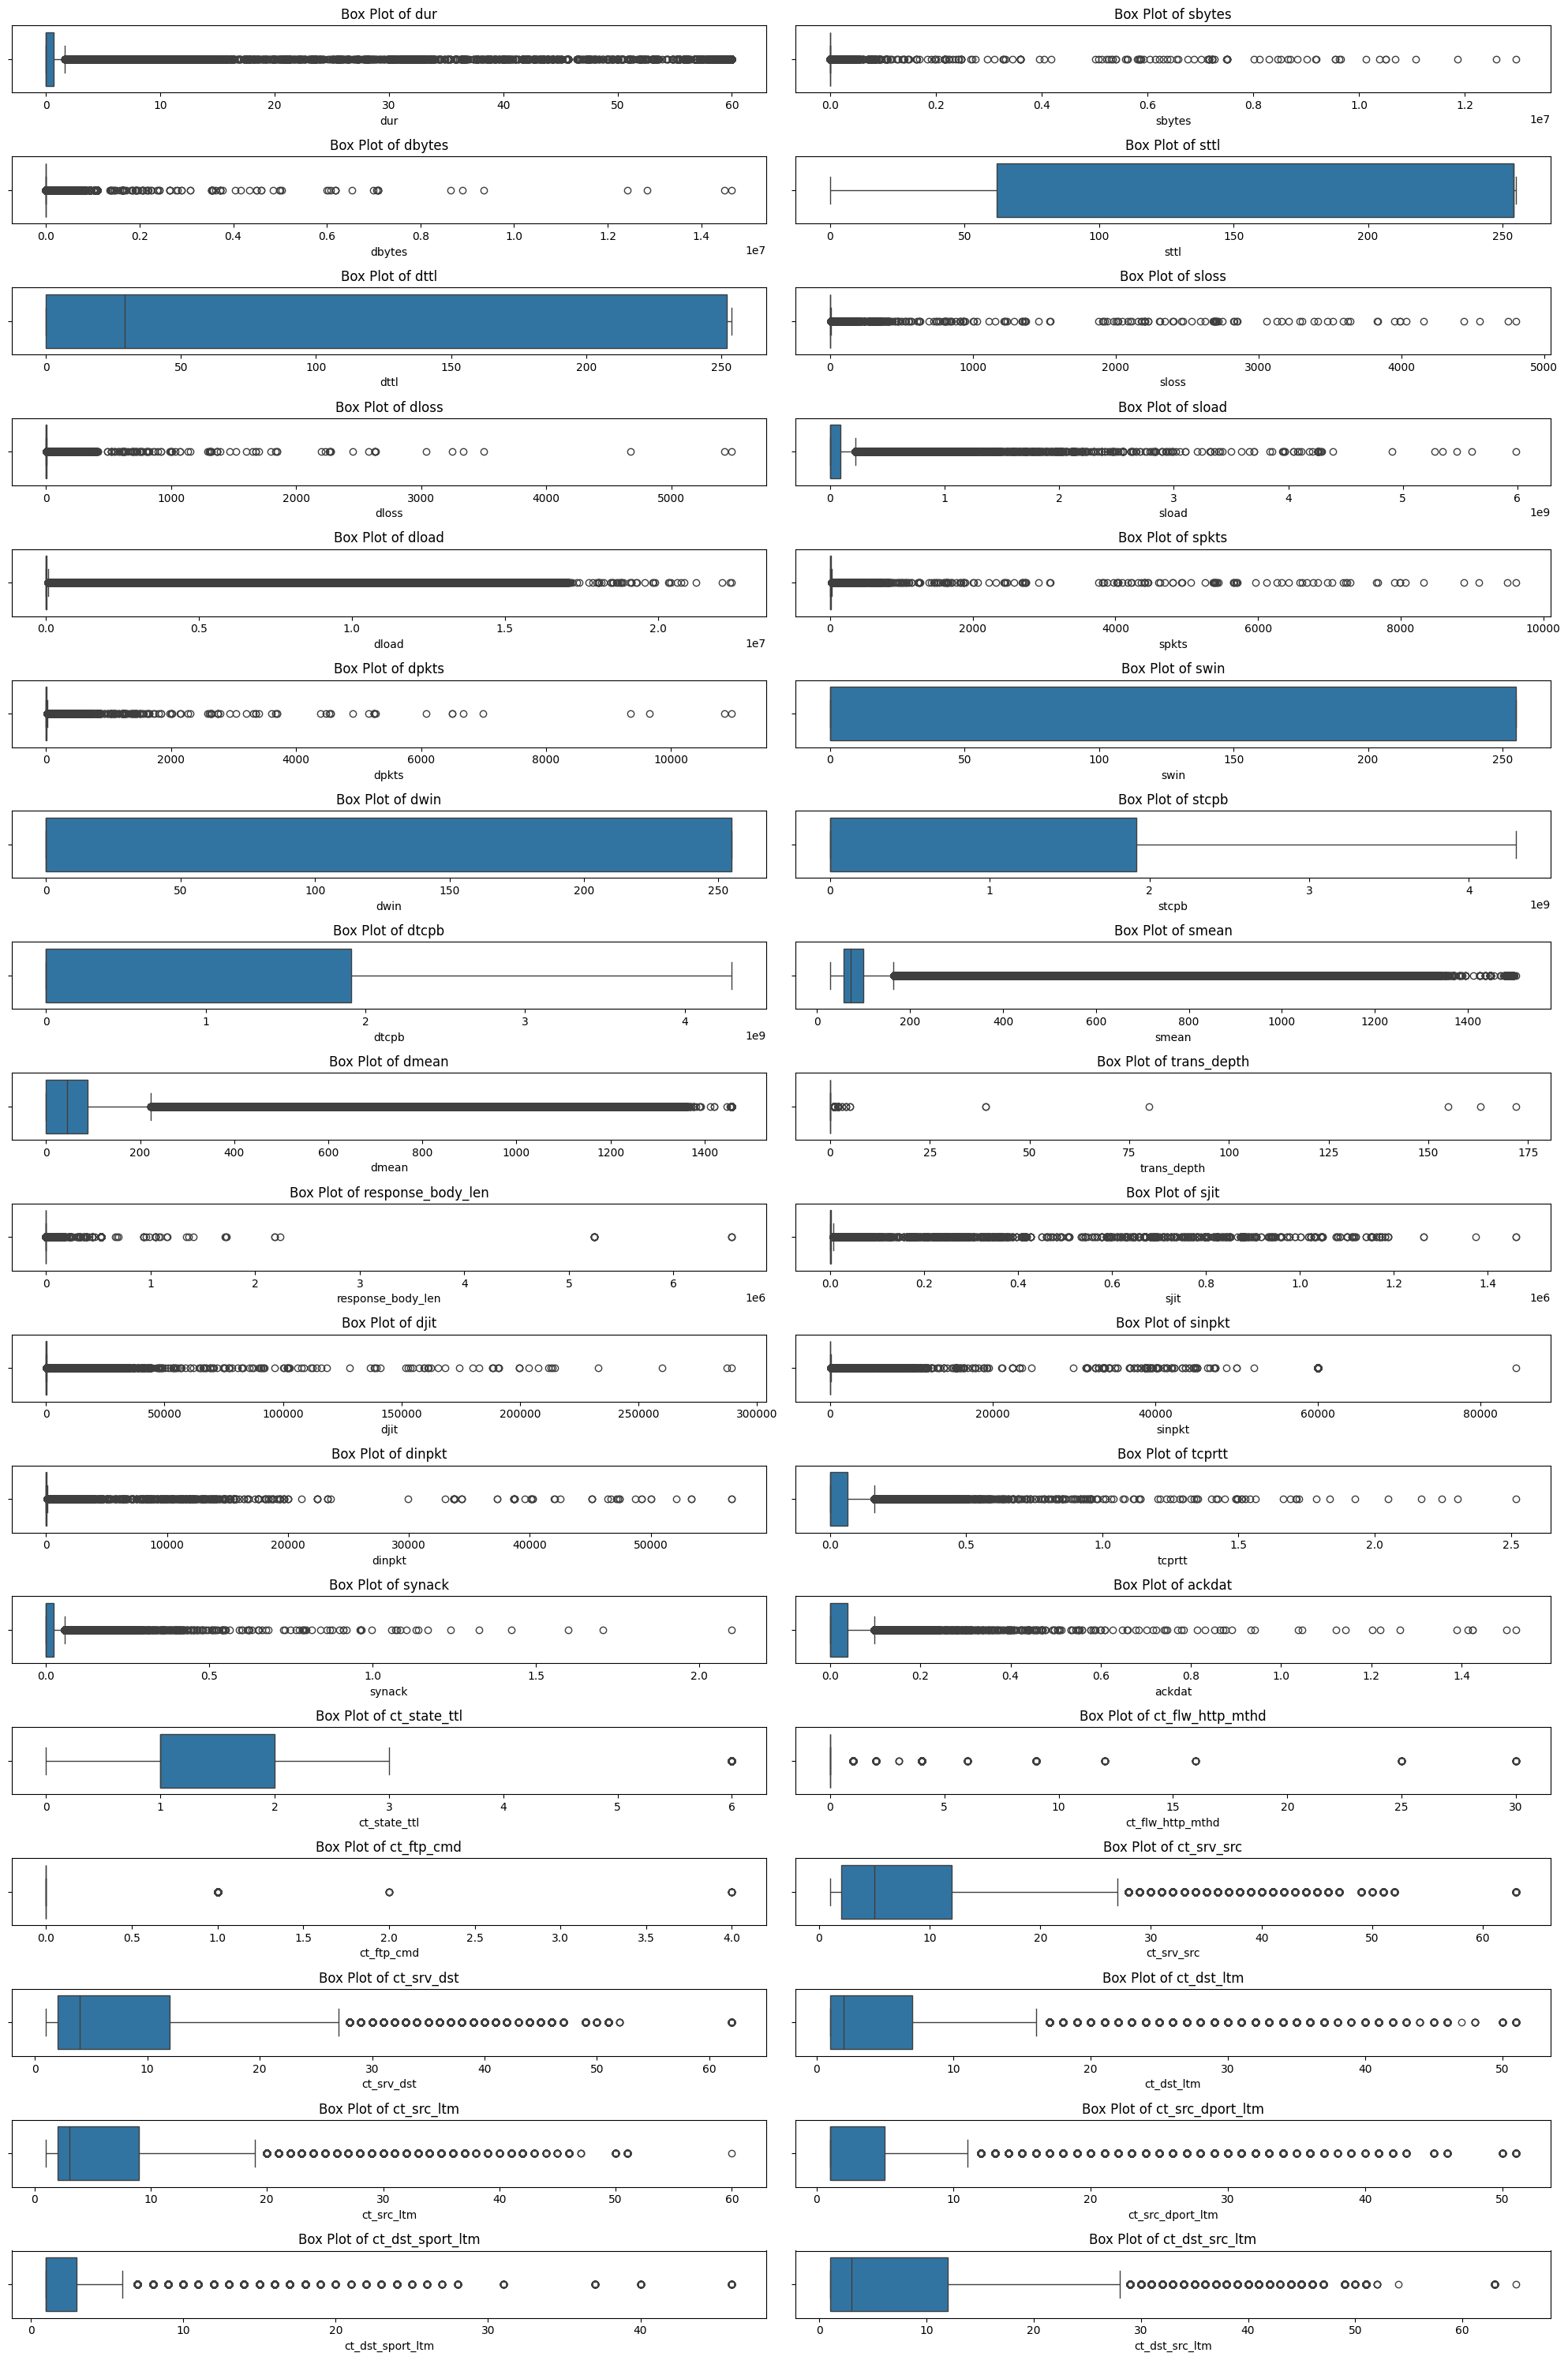

In [19]:
plt.figure(figsize=(20, 30))
for i, column in enumerate(non_categorical_feat, 1):
    plt.subplot(18, 2, i)
    sns.boxplot(x=df_train[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Missing values and outliers are important to identify because they can disrupt the data training process. They will later need to be treated accordingly. Missing values can lead to biased results or limit the use of certain algorithms that require complete data, while outliers can skew metrics like the mean and standard deviation, affecting the accuracy and generalizability of models. Identifying these irregularities early on ensures that appropriate handling techniques, such as imputation for missing values and transformation or removal of outliers, can be applied to maintain the integrity and quality of the dataset, ultimately leading to more reliable and robust model performance.

#### Correlation Between Features

In [20]:
corr = df_train[non_categorical_feat].corr()
corr

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
dur,1.000000,0.202774,0.145071,0.011992,0.045195,0.197640,0.145543,-0.081312,-0.050443,0.255768,0.184342,0.022240,0.017929,0.013477,0.015777,0.091000,0.025476,0.002335,0.080118,0.148292,0.157505,0.079994,0.153865,0.054290,0.052004,0.050365,0.188062,0.023578,0.020908,-0.113574,-0.115411,-0.086758,-0.081485,-0.094007,-0.093780,-0.101684
sbytes,0.202774,1.000000,0.010087,-0.021082,0.063344,0.995869,0.007011,-0.018519,-0.007867,0.962399,0.188518,0.050480,0.051784,0.043348,0.038189,0.233101,-0.004939,0.004203,0.001790,-0.002042,-0.003493,-0.006632,0.000093,0.043775,0.040632,0.043277,-0.010223,-0.002210,-0.004513,-0.034231,-0.034776,-0.026692,-0.027559,-0.026761,-0.027446,-0.032233
dbytes,0.145071,0.010087,1.000000,-0.135731,0.024822,0.017371,0.996416,-0.040463,0.107409,0.205747,0.971798,0.112998,0.115184,0.087498,0.086612,-0.036756,0.420840,0.029775,0.459686,-0.002468,0.046608,-0.014079,-0.007834,0.003381,-0.000618,0.007271,-0.093752,0.055187,-0.010537,-0.045325,-0.044691,-0.043004,-0.045658,-0.052329,-0.056913,-0.054274
sttl,0.011992,-0.021082,-0.135731,1.000000,-0.033042,-0.044240,-0.165732,0.275840,-0.397367,-0.101733,-0.189196,-0.416514,-0.424240,-0.336851,-0.334341,-0.010541,-0.550445,-0.060778,-0.049584,0.023287,-0.122934,-0.207496,-0.003046,0.040637,0.042089,0.032398,0.671069,-0.114292,-0.123607,0.345534,0.341134,0.271205,0.273079,0.344553,0.380265,0.404403
dttl,0.045195,0.063344,0.024822,-0.033042,1.000000,0.075353,0.036347,-0.280009,-0.116282,0.068295,0.054272,0.745816,0.753590,0.593199,0.596429,0.195392,0.140645,0.146709,0.017022,0.148087,0.100598,-0.081903,0.096946,0.806888,0.747502,0.779993,-0.261688,0.226689,0.106946,-0.417425,-0.431232,-0.381490,-0.364642,-0.366542,-0.388749,-0.403934
sloss,0.197640,0.995869,0.017371,-0.044240,0.075353,1.000000,0.018578,-0.028973,0.008410,0.969613,0.196450,0.082785,0.083923,0.067384,0.061695,0.230029,0.016861,0.004365,-0.001819,0.000561,0.002467,-0.009770,0.000756,0.051159,0.047650,0.049873,-0.036241,-0.001976,0.006042,-0.044954,-0.045851,-0.036956,-0.038810,-0.039486,-0.041378,-0.045971
dloss,0.145543,0.007011,0.996416,-0.165732,0.036347,0.018578,1.000000,-0.051936,0.124604,0.210312,0.978632,0.145655,0.148547,0.113555,0.112460,-0.031636,0.437335,0.028168,0.454844,-0.002231,0.050049,-0.018012,-0.008331,0.010116,0.005737,0.014066,-0.122248,0.054380,0.007758,-0.059686,-0.059390,-0.055350,-0.057898,-0.067694,-0.073385,-0.071239
sload,-0.081312,-0.018519,-0.040463,0.275840,-0.280009,-0.028973,-0.051936,1.000000,-0.106381,-0.051371,-0.065694,-0.351643,-0.351069,-0.277512,-0.279514,0.224520,-0.186287,-0.058665,-0.015058,-0.042599,-0.057333,-0.048052,-0.034815,-0.203119,-0.188134,-0.195509,0.291700,-0.073819,-0.046218,0.138325,0.142832,0.077300,0.085040,0.101313,0.082540,0.154109
dload,-0.050443,-0.007867,0.107409,-0.397367,-0.116282,0.008410,0.124604,-0.106381,1.000000,0.076295,0.139470,0.271230,0.274170,0.216066,0.210565,-0.084232,0.551158,-0.030314,0.024342,-0.029490,-0.032503,-0.037581,-0.024071,-0.134989,-0.124890,-0.130825,-0.373258,-0.039342,-0.027850,-0.080893,-0.087490,-0.100885,-0.098587,-0.143921,-0.153378,-0.161435
spkts,0.255768,0.962399,0.205747,-0.101733,0.068295,0.969613,0.210312,-0.051371,0.076295,1.000000,0.387687,0.132786,0.135614,0.105260,0.100116,0.215057,0.149720,0.009450,0.089045,-0.000298,0.017205,-0.017816,-0.001537,0.038008,0.034945,0.037760,-0.086231,0.006787,0.010234,-0.068724,-0.069854,-0.059559,-0.061328,-0.068359,-0.072335,-0.076982


#### Distribution of Continuous Features

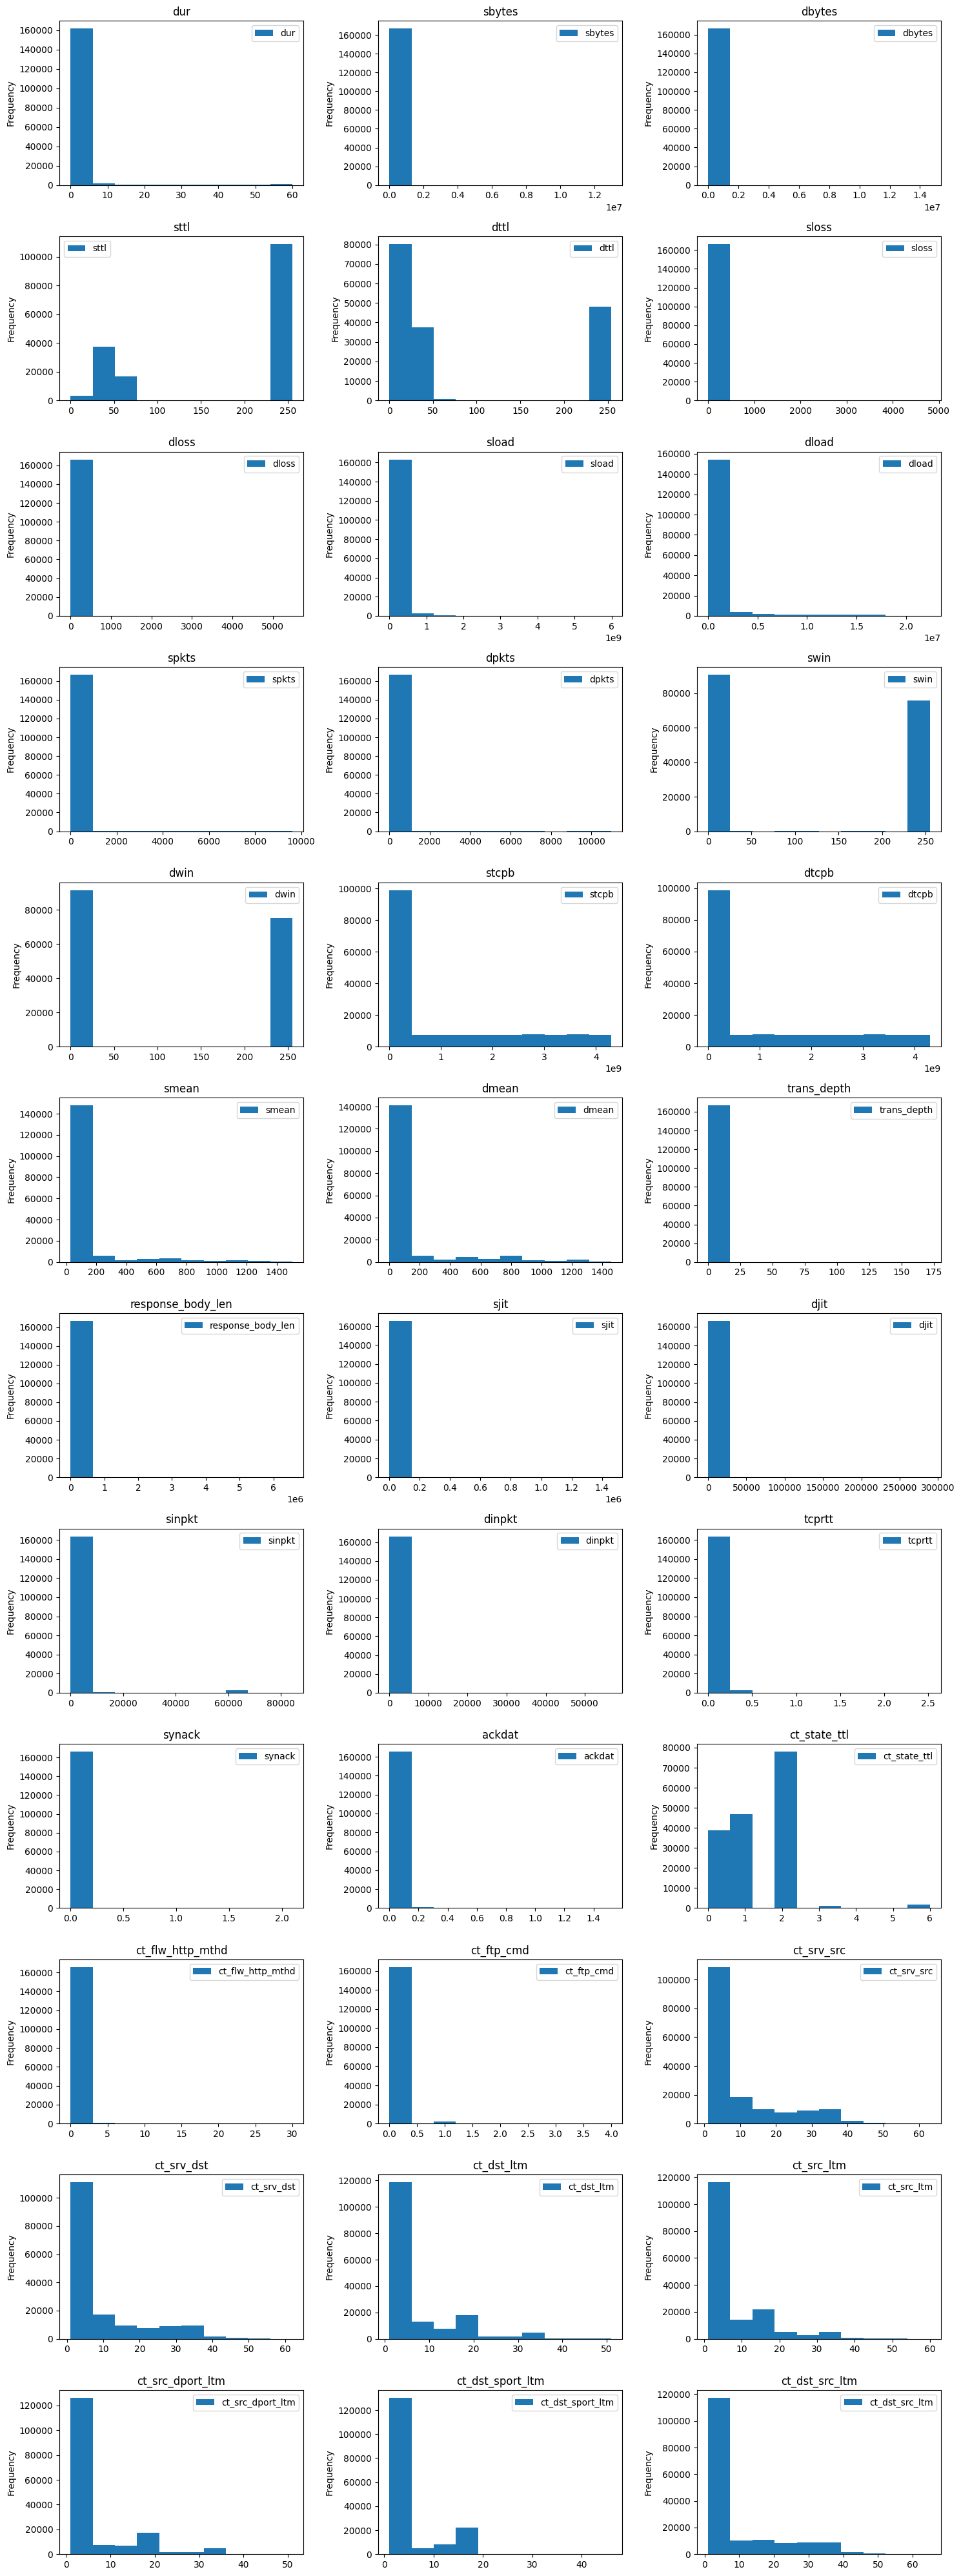

In [21]:
_, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 40))

c = 0

for i in range(12):
    df_train.plot(kind='hist', column=non_categorical_feat.iloc[c], ax=axes[i, 0])
    axes[i, 0].set_title(non_categorical_feat.iloc[c])

    df_train.plot(kind='hist', column=non_categorical_feat.iloc[c + 1], ax=axes[i, 1])
    axes[i, 1].set_title(non_categorical_feat.iloc[c + 1])

    df_train.plot(kind='hist', column=non_categorical_feat.iloc[c + 2], ax=axes[i, 2])
    axes[i, 2].set_title(non_categorical_feat.iloc[c + 2])

    c += 3

plt.tight_layout()
plt.show()

#### Distribution of Categorical Features

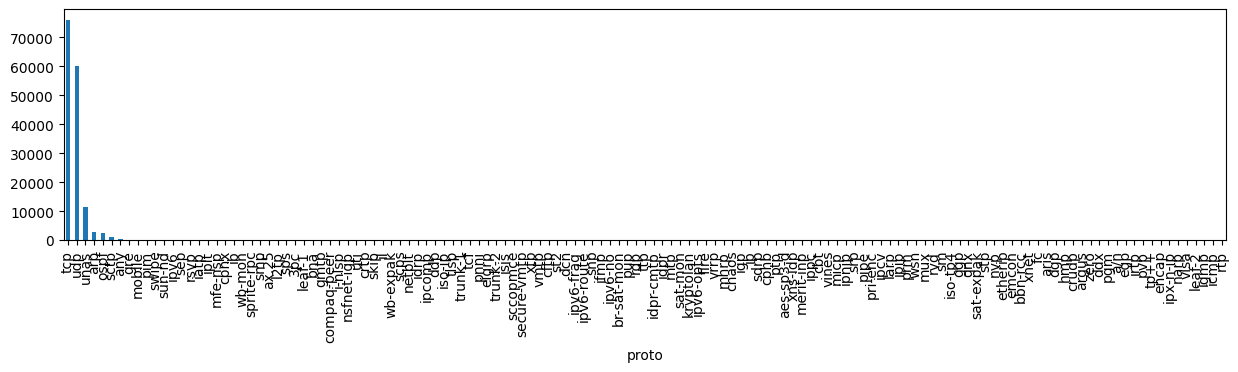

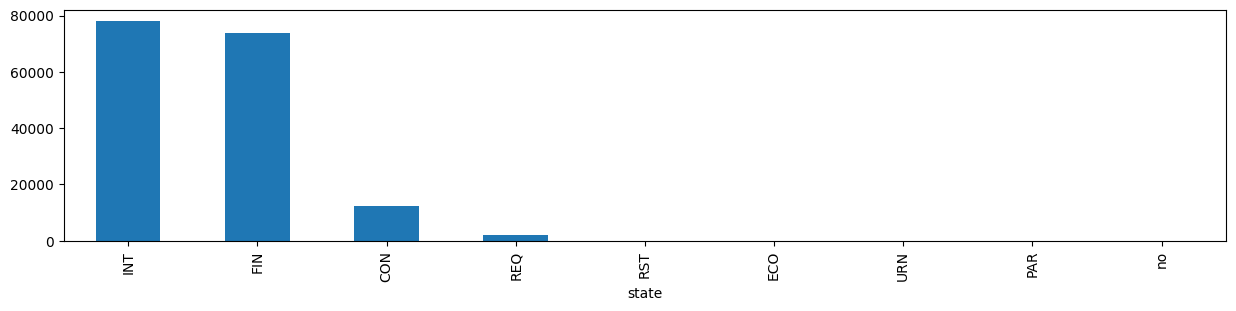

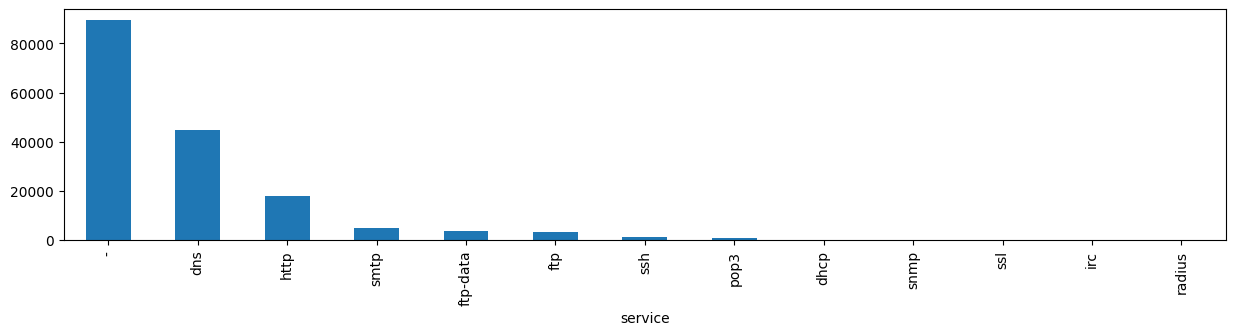

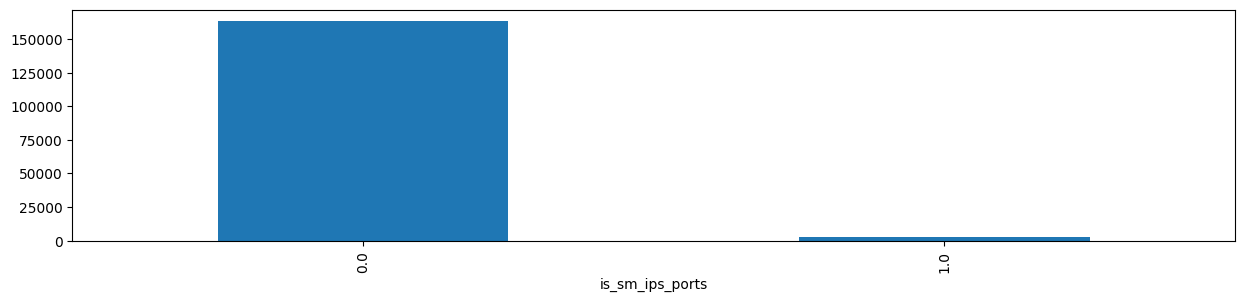

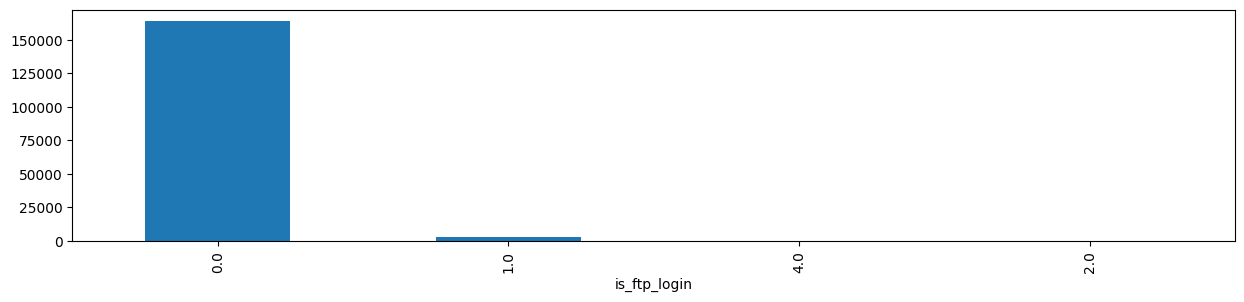

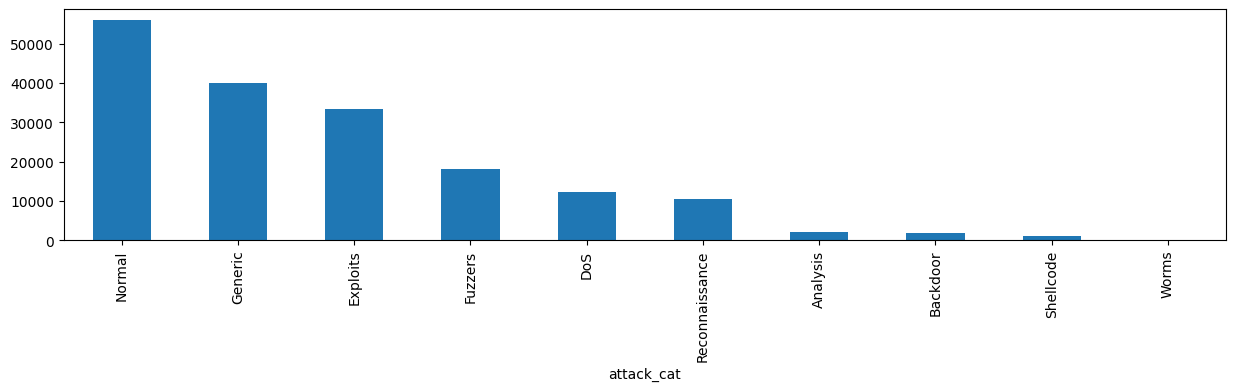

In [22]:
for col in categorical_feat:
  df_train[col].value_counts().plot.bar(figsize=(15, 3))
  plt.show()

#### Correlation Between Feature and Target

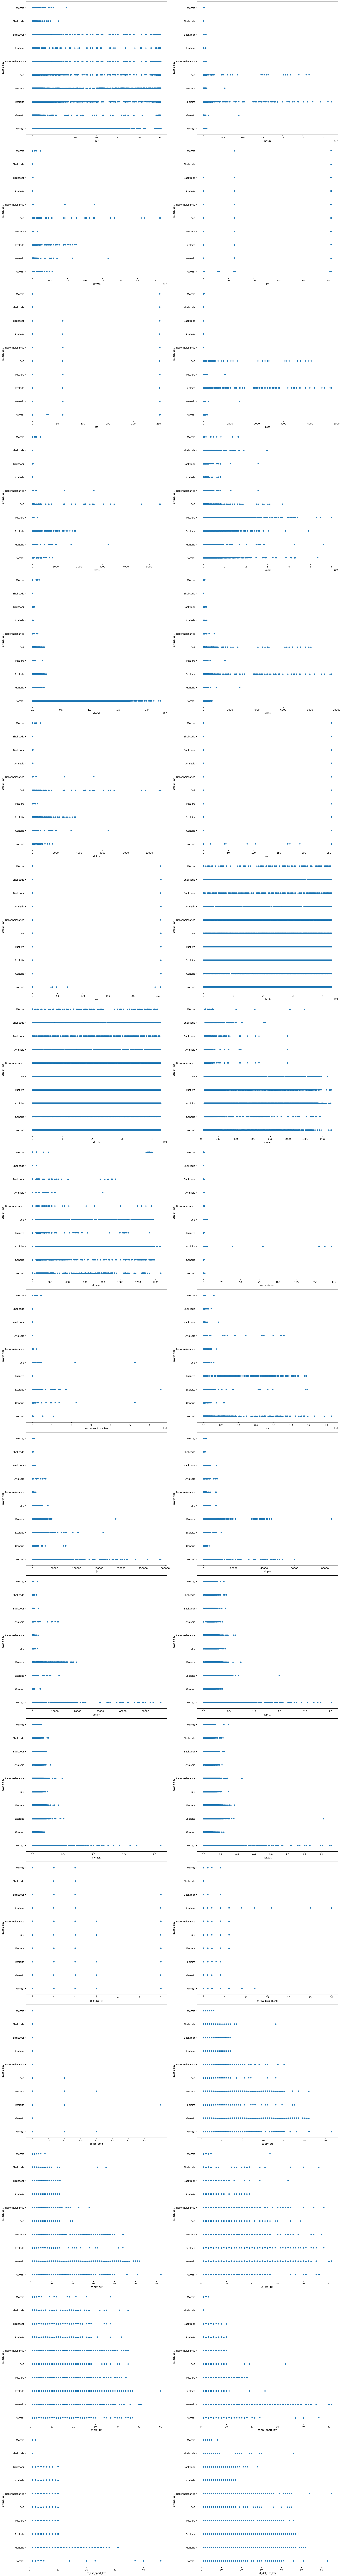

In [23]:
df_train = df_train.dropna(subset=['attack_cat'])

_, axes = plt.subplots(nrows=18, ncols=2, figsize=(20, 150))
cols = list(non_categorical_feat)
for i in range(36):
    if i < len(cols):
        df_train.plot(kind='scatter', x=cols[i], y='attack_cat', ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

The correlation between features will later be useful for feature selection, as features with high correlation may be redundant for training. The distribution of values in each feature is a good way to have an idea of where most of the data is concentrated. Understanding feature distributions helps identify patterns, potential outliers, and the need for transformations, which can improve model performance and interpretability. The correlation between features and targets is important for understanding the relevance of each feature to the target features, guiding feature engineering efforts and helping to prioritize features that contribute most to predicting the target. Together, analyzing distributions and correlations aids in refining data quality and ensuring that the model is trained on the most informative and non-redundant features.

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [24]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

original_train_set = df_train.copy()

train_set, val_set = train_test_split(df_train, test_size=0.2, random_state=42)

In [25]:
print(train_set.columns)
print(val_set.columns)

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat'],
      dtype='object')
Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [26]:
# for numerical features
num_imputer = SimpleImputer(strategy='mean')
train_set[non_categorical_feat] = num_imputer.fit_transform(train_set[non_categorical_feat])
val_set[non_categorical_feat] = num_imputer.transform(val_set[non_categorical_feat])

# for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
train_set[categorical_feat] = cat_imputer.fit_transform(train_set[categorical_feat])
val_set[categorical_feat] = cat_imputer.transform(val_set[categorical_feat])

The chosen imputation methods are guided by the characteristics of the dataset and the need to preserve its integrity. Mean imputation is applied to numerical features as it effectively maintains the overall distribution, particularly when data is missing at random. For categorical features, mode imputation is used to replace missing values with the most frequent category, ensuring minimal disruption to the dataset's patterns. These methods are computationally efficient and align well with the nature of the UNSW-NB15 dataset, where data completeness is critical for robust model performance.

In [27]:
# check for missing values again
train_set.isnull().sum()

proto                0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
attack_cat           0
dtype: int64

In [28]:
val_set.isnull().sum()

proto                0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
attack_cat           0
dtype: int64

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [29]:
def iqr_capping(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return np.clip(data[feature], lower_limit, upper_limit)

In [30]:
for feature in non_categorical_feat:
    if feature in train_set.columns:
        train_set[feature] = iqr_capping(train_set, feature)
    else:
        print(f"Warning: Feature '{feature}' not found in training set. Skipping.")
    if feature in val_set.columns:
        val_set[feature] = iqr_capping(val_set, feature)
    else:
        print(f"Warning: Feature '{feature}' not found in validation set. Skipping.")

In [31]:
# visualize after capping
def visualize_after_capping(data, features):
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.boxplot(data=data, x=feature, ax=axes[i])
        axes[i].set_title(f'{feature} after capping')

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

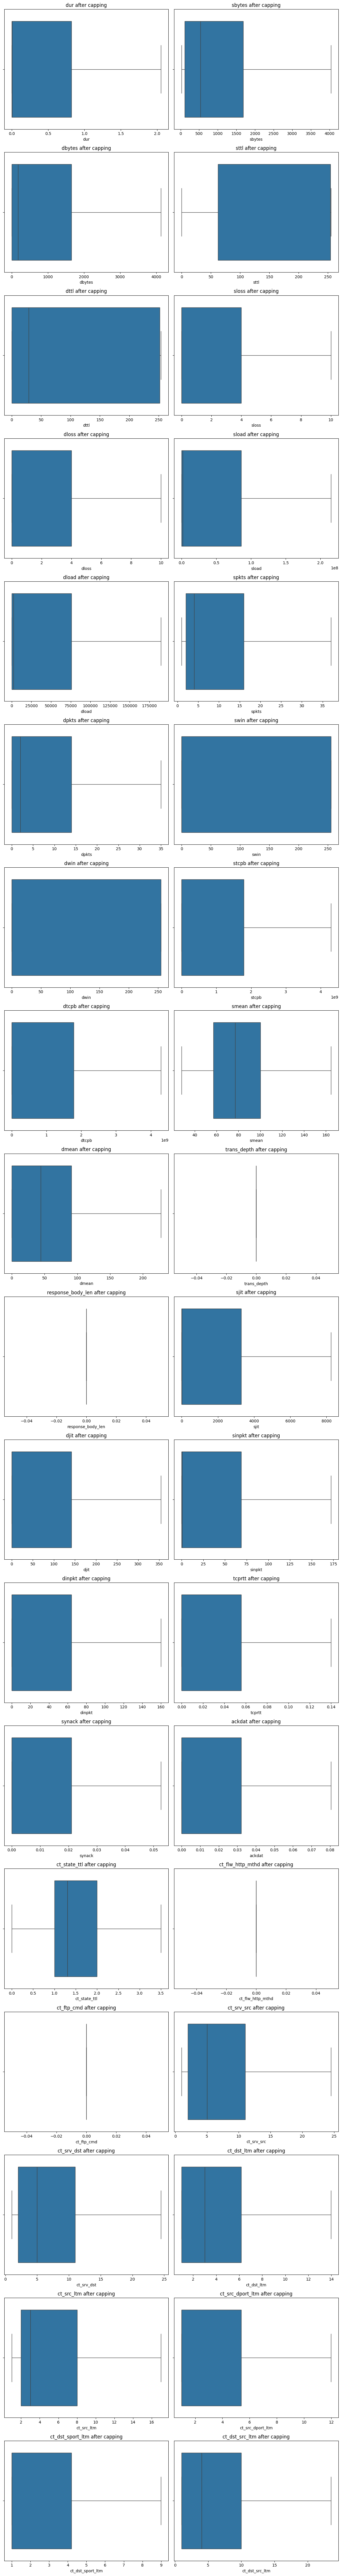

In [32]:
visualize_after_capping(train_set, non_categorical_feat)

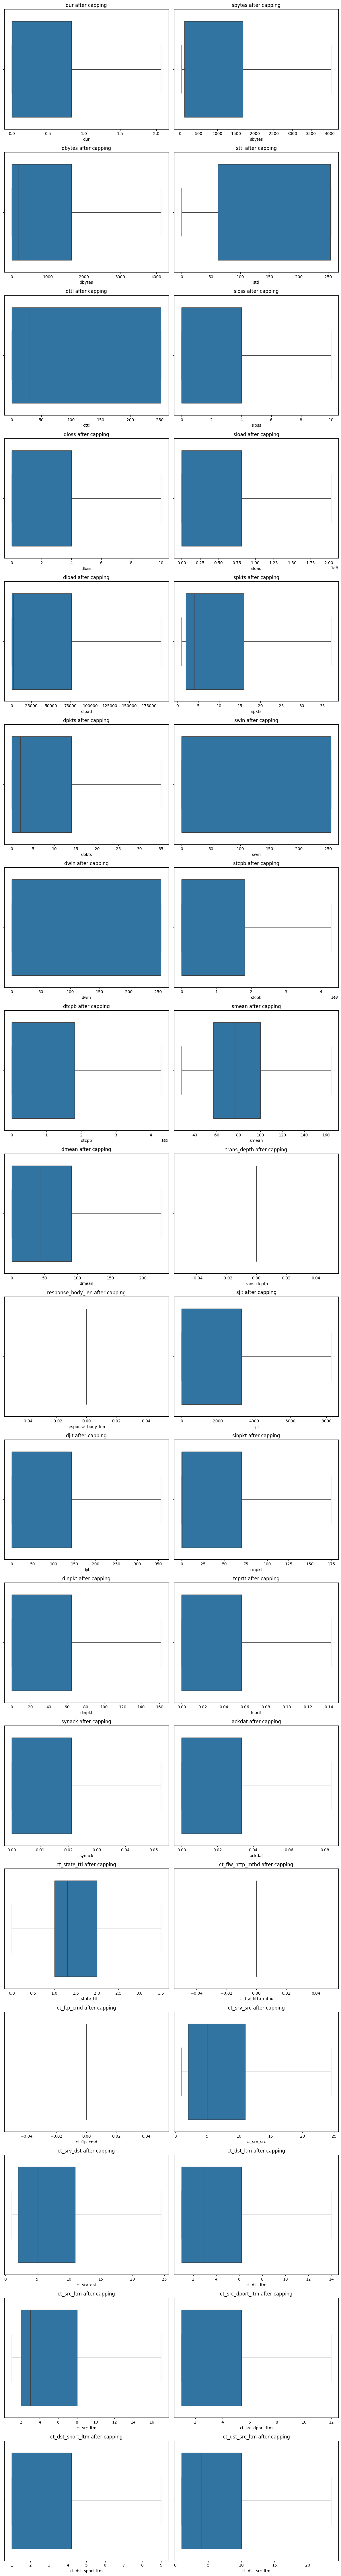

In [33]:
visualize_after_capping(val_set, non_categorical_feat)

IQR Capping was chosen as the primary method to handle outliers because it effectively reduces extreme values while preserving the integrity of the dataset. Unlike deletion, which risks data loss, or transformations that may distort feature relationships, IQR Capping ensures that the main distribution remains intact. This method is particularly suited for features with skewed distributions, as observed in the dataset, making it robust for machine learning models.

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [34]:
# before dropping
print("Before dropping duplicates in training set:", train_set.duplicated().sum())
print("Before dropping duplicates in validation set:", val_set.duplicated().sum())

Before dropping duplicates in training set: 13566
Before dropping duplicates in validation set: 2255


In [35]:
train_set = train_set.drop_duplicates()
val_set = val_set.drop_duplicates()

In [36]:
# after dropping
print("After dropping duplicates in training set:", train_set.duplicated().sum())
print("After dropping duplicates in validation set:", val_set.duplicated().sum())

After dropping duplicates in training set: 0
After dropping duplicates in validation set: 0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

**Validating Data**
There is incorrect data in the dataset, namely in the feature 'state' and 'service'. These features have predefined values, but there are rows that do not fall within those predefined values. Therefore, the column values will be adjusted to fall within the predefined categories.

In [37]:
states = ["ACC", "CLO", "CON", "ECO", "ECR", "FIN", "INT", "MAS", "PAR", "REQ", "RST", "TST", "TXD", "URH", "URN", "-"]
services = ["http", "ftp", "smtp", "ssh", "dns", "ftp-data","irc", "-"]

train_set.loc[~train_set.state.isin(states), 'state'] = '-'
train_set.loc[~train_set.service.isin(services), 'service'] = '-'
val_set.loc[~val_set.state.isin(states), 'state'] = '-'
val_set.loc[~val_set.service.isin(services), 'service'] = '-'

In [38]:
print(train_set['state'].unique())
print(val_set['state'].unique())

['FIN' 'INT' 'CON' 'REQ' 'RST' 'ECO' '-' 'PAR']
['INT' 'CON' 'FIN' 'RST' 'REQ' 'ECO' 'URN']


In [39]:
print(train_set['service'].unique())
print(val_set['service'].unique())

['-' 'dns' 'http' 'ftp-data' 'ftp' 'smtp' 'ssh' 'irc']
['dns' '-' 'http' 'smtp' 'ftp-data' 'ftp' 'ssh' 'irc']


Removing Redundant Columns

In [40]:
for c in corr.columns:
    corr_c = corr[c]
    corr_c = corr_c[((corr_c > 0.75) & (corr_c < 1)) | ((corr_c < -0.75) & (corr_c > -1))].dropna()
    if (not corr_c.empty):
        print(corr_c)

sloss    0.995869
spkts    0.962399
Name: sbytes, dtype: float64
dloss    0.996416
dpkts    0.971798
Name: dbytes, dtype: float64
dwin      0.753590
tcprtt    0.806888
ackdat    0.779993
Name: dttl, dtype: float64
sbytes    0.995869
spkts     0.969613
Name: sloss, dtype: float64
dbytes    0.996416
dpkts     0.978632
Name: dloss, dtype: float64
sbytes    0.962399
sloss     0.969613
Name: spkts, dtype: float64
dbytes    0.971798
dloss     0.978632
Name: dpkts, dtype: float64
dwin     0.990097
stcpb    0.781169
dtcpb    0.781244
Name: swin, dtype: float64
dttl     0.753590
swin     0.990097
stcpb    0.788870
dtcpb    0.789103
Name: dwin, dtype: float64
swin    0.781169
dwin    0.788870
Name: stcpb, dtype: float64
swin    0.781244
dwin    0.789103
Name: dtcpb, dtype: float64
dttl      0.806888
synack    0.948882
ackdat    0.941391
Name: tcprtt, dtype: float64
tcprtt    0.948882
ackdat    0.786561
Name: synack, dtype: float64
dttl      0.779993
tcprtt    0.941391
synack    0.786561
Name: ac

According to the above results, the groups of columns with high correlation within them is as follows:
- [sbytes, spkts, sloss]
- [dbytes, dpkts, dloss]
- [swin, dwin, stcpb, dtcpb]
- [tcprtt, synack, ackdat]
- [ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_src_sport_ltm, ct_dst_src_ltm]
Therefore, all but one of the columns in each group will be dropped.

In [41]:
dropped_cols = ['spkts', 'sloss', 'dpkts', 'dloss', 'dwin', 'stcpb', 'dtcpb', 'synack', 'ackdat', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
train_set = train_set.drop(columns=dropped_cols)
val_set = val_set.drop(columns=dropped_cols)

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [42]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [43]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return pd.DataFrame(self.scaler.transform(X), columns=X.columns)

We use Standard Scaler for feature scaling as it standardizes numerical features by removing the mean and scaling to unit variance. This method ensures that all features contribute equally to the model training process, especially for algorithms sensitive to feature magnitude, such as Logistic Regression and KNN. Standardization is robust against outliers compared to Min-Max scaling and is suitable for datasets with numerical features of varying scales.

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [44]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, unknown_label="unknown"):
        self.encoders = {}
        self.unknown_label = unknown_label

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            unique_values = X[col].unique().tolist()
            if self.unknown_label not in unique_values:
                unique_values.append(self.unknown_label)
            le.fit(unique_values)
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col, encoder in self.encoders.items():
            X_encoded[col] = X_encoded[col].apply(lambda x: x if x in encoder.classes_ else self.unknown_label)
            X_encoded[col] = encoder.transform(X_encoded[col])
        return X_encoded

Label Encoding is chosen for categorical feature encoding because it efficiently converts categorical values into integer representations while preserving their relationships for algorithms that can handle numerical data directly, such as tree-based models. Although one-hot encoding is another option, it can result in high dimensionality when dealing with many categories, which could unnecessarily complicate the model.

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [45]:
train_set['attack_cat'].value_counts()

attack_cat
Normal            43948
Exploits          25584
Generic           21650
Fuzzers           14452
DoS                9119
Reconnaissance     8005
Analysis           1602
Backdoor           1371
Shellcode           873
Worms               102
Name: count, dtype: int64

In [46]:
target_samples = {
    'Normal': 500,
    'Exploits': 300,
    'Generic': 200,
    'Fuzzers': 100,
    'DoS': 100,
    'Reconnaissance': 100,
    'Analysis': 100,
    'Backdoor': 100,
    'Shellcode': 100,
    'Worms': 100
}

train_set_reduced = pd.concat([
    train_set[train_set['attack_cat'] == category].sample(n=target_samples[category], random_state=42)
    if category in target_samples else train_set[train_set['attack_cat'] == category]
    for category in train_set['attack_cat'].unique()
])

print("Distribution after reduction:")
print(train_set_reduced['attack_cat'].value_counts())
train_set = train_set_reduced

Distribution after reduction:
attack_cat
Normal            500
Exploits          300
Generic           200
Analysis          100
Fuzzers           100
DoS               100
Reconnaissance    100
Shellcode         100
Backdoor          100
Worms             100
Name: count, dtype: int64


To speed up the training process and SMOTE, the majority classes such as Normal, Exploits, and Generic were significantly reduced. This reduction was performed using random sampling to ensure the data remains representative. This strategy aims to reduce computational time, maintain class balance using SMOTE, and improve model efficiency without significant loss of performance.

In [47]:
class HandleImbalance(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.smote = SMOTE(random_state=42)

    def fit(self, X, y=None):
        self.X_resampled, self.y_resampled = self.smote.fit_resample(X, y)
        return self

    def transform(self, X, y=None):
        return X

Given the class imbalance in the dataset (e.g., majority class Normal has 43,958 samples, while the minority class Worms has only 108 samples), we choose SMOTE (Synthetic Minority Oversampling Technique). SMOTE generates synthetic samples for the minority class by interpolating between existing samples, reducing overfitting that can occur with simple duplication. Oversampling is preferred over undersampling to avoid losing valuable data from the majority class.

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [48]:
class DataNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_normalized = X.copy()
        for col in X.columns:
            X_normalized[col] = np.log1p(X[col])  # log(1 + x) for numerical stability
        return X_normalized

For Data Normalization, we use Log Transformation for numerical features that exhibit skewness or heavy-tailed distributions. Log transformation stabilizes variance, reduces the impact of outliers, and can make the dataset more normally distributed, which improves the performance of algorithms sensitive to such distributions, such as linear models. It is particularly useful for features with values spanning several orders of magnitude.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [49]:
# Write your code here


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [50]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [51]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [52]:
print(train_set['attack_cat'].unique())
print(val_set['attack_cat'].unique())

['Normal' 'Exploits' 'Generic' 'Analysis' 'Fuzzers' 'DoS' 'Reconnaissance'
 'Shellcode' 'Backdoor' 'Worms']
['Generic' 'Exploits' 'DoS' 'Normal' 'Fuzzers' 'Reconnaissance' 'Backdoor'
 'Shellcode' 'Analysis' 'Worms']


In [53]:
# KNN Pipeline
knn_pipeline = Pipeline([
    ('encoding', FeatureEncoder()),         # Encode categorical features
    ('scaling', FeatureScaler()),           # Scale numerical features
    ('oversampling', HandleImbalance())     # Handle class imbalance with SMOTE
])

# GNB Pipeline
gnb_pipeline = Pipeline([
    ('encoding', FeatureEncoder()),         # Encode categorical features
    ('oversampling', HandleImbalance())     # Handle class imbalance with SMOTE
])

# ID3 Pipeline
id3_pipeline = Pipeline([
    ('encoding', FeatureEncoder()),         # Encode categorical features
])

for col in categorical_feat:
    unseen_values = ~val_set[col].isin(train_set[col].unique())
    if unseen_values.any():
        # Replace unseen values with 'unknown'
        val_set[col] = val_set[col].where(val_set[col].isin(train_set[col].unique()), 'unknown')

# Process train and validation sets
X_train_knn = knn_pipeline.fit_transform(train_set.drop(columns=['attack_cat']), train_set['attack_cat'])
X_val_knn = knn_pipeline.transform(val_set.drop(columns=['attack_cat']))
y_train_knn = train_set['attack_cat']
y_val_knn = val_set['attack_cat']

X_train_gnb = gnb_pipeline.fit_transform(train_set.drop(columns=['attack_cat']), train_set['attack_cat'])
X_val_gnb = gnb_pipeline.transform(val_set.drop(columns=['attack_cat']))
y_train_gnb = train_set['attack_cat']
y_val_gnb = val_set['attack_cat']

X_train_id3 = id3_pipeline.fit_transform(train_set.drop(columns=['attack_cat']), train_set['attack_cat'])
X_val_id3 = id3_pipeline.transform(val_set.drop(columns=['attack_cat']))
y_train_id3 = train_set['attack_cat']
y_val_id3 = val_set['attack_cat']

/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate argument

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [54]:
def evaluate_model(model_name, y_true, y_pred, y_proba=None, classes=None):
    """
    Evaluates and visualizes the model's performance.
    """
    print(f"=== {model_name} Evaluation ===")

    # classification report and macro F1-score
    report = classification_report(y_true, y_pred, target_names=classes, zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    print(report)
    print(f"Macro-Averaged F1 Score: {f1_macro:.4f}")

    # confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC curve
    if y_proba is not None and len(classes) == 2:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
        plt.title(f'{model_name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

In [55]:
class_names = train_set['attack_cat'].unique().tolist()

results = {}

In [56]:
# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## A. KNN

### KNN Implementation From Scratch



In [57]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2) ** p) ** (1/p)

    def _compute_distance(self, x1, x2):
        if self.distance_metric == "euclidean":
            return self._euclidean_distance(x1, x2)
        elif self.distance_metric == "manhattan":
            return self._manhattan_distance(x1, x2)
        elif self.distance_metric == "minkowski":
            return self._minkowski_distance(x1, x2)
        else:
            raise ValueError("Invalid distance metric: {}".format(self.distance_metric))

    def predict(self, X):
        prediction = []
        for _, x in X.iterrows():
            distances = [self._compute_distance(x.values, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            prediction.append(most_common[0][0])
        return np.array(prediction)

    def get_params(self, deep=True):
        return {"k": self.k, "distance_metric": self.distance_metric}

=== KNN (Scratch) Evaluation ===
                precision    recall  f1-score   support

        Normal       0.07      0.35      0.11       382
      Exploits       0.05      0.24      0.08       367
       Generic       0.29      0.12      0.17      2389
      Analysis       0.65      0.50      0.57      6533
       Fuzzers       0.52      0.35      0.41      3631
           DoS       0.95      0.94      0.94      6099
Reconnaissance       0.88      0.85      0.87     11119
     Shellcode       0.49      0.46      0.47      2007
      Backdoor       0.08      0.41      0.14       259
         Worms       0.03      0.75      0.06        28

      accuracy                           0.65     32814
     macro avg       0.40      0.50      0.38     32814
  weighted avg       0.71      0.65      0.67     32814

Macro-Averaged F1 Score: 0.3831


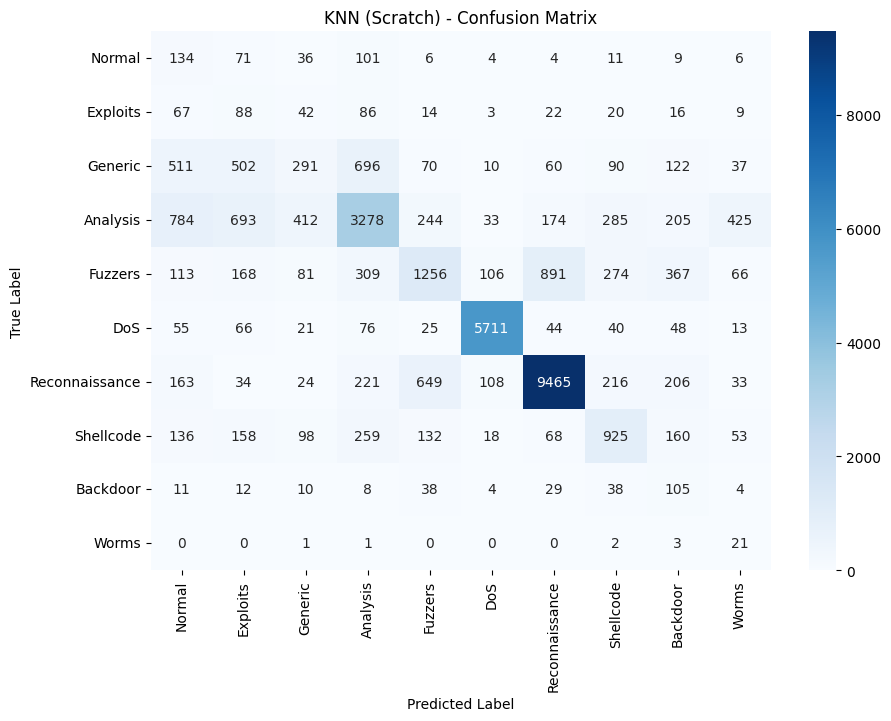

In [58]:
knn = KNN(k=5, distance_metric='euclidean')
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_val_knn)

evaluate_model("KNN (Scratch)", y_val_knn, y_pred_knn, classes=class_names)

### KNN Implementation From Library

=== KNN (Library) Evaluation ===
                precision    recall  f1-score   support

        Normal       0.07      0.49      0.12       382
      Exploits       0.04      0.21      0.07       367
       Generic       0.28      0.12      0.17      2389
      Analysis       0.65      0.50      0.56      6533
       Fuzzers       0.51      0.37      0.43      3631
           DoS       0.96      0.93      0.94      6099
Reconnaissance       0.89      0.84      0.86     11119
     Shellcode       0.52      0.43      0.47      2007
      Backdoor       0.10      0.37      0.16       259
         Worms       0.04      0.75      0.07        28

      accuracy                           0.64     32814
     macro avg       0.41      0.50      0.39     32814
  weighted avg       0.72      0.64      0.67     32814

Macro-Averaged F1 Score: 0.3861


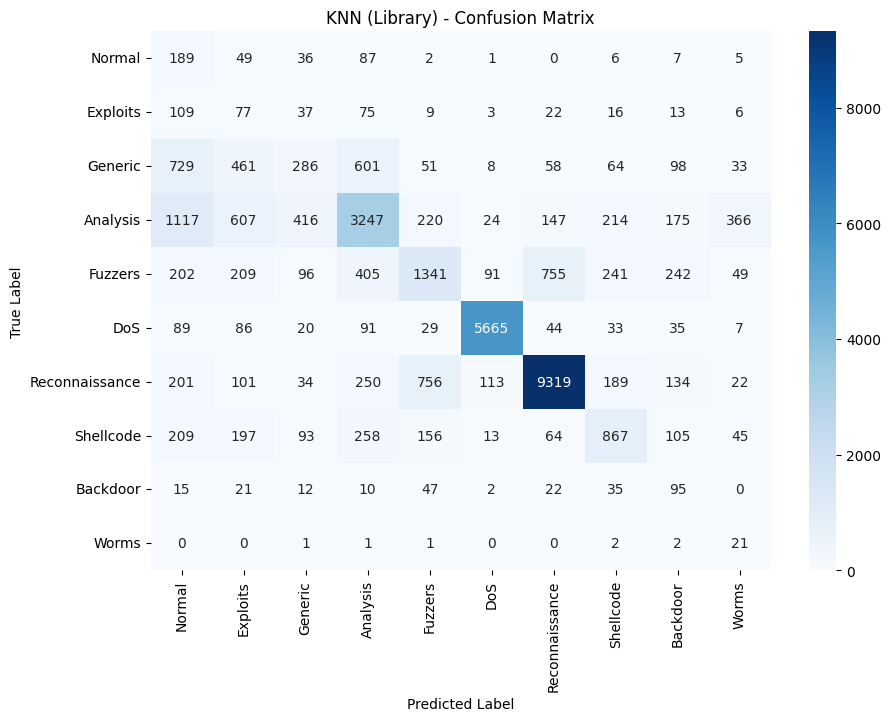

In [59]:
knn_lib = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_lib.fit(X_train_knn, y_train_knn)
y_pred_knn_lib = knn_lib.predict(X_val_knn)
y_proba_knn_lib = knn_lib.predict_proba(X_val_knn)[:, 1] if len(class_names) == 2 else None

evaluate_model("KNN (Library)", y_val_knn, y_pred_knn_lib, y_proba_knn_lib, classes=class_names)

## B. Naive Bayes

### GNB Implementation From Scratch

In [60]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]

    def _gaussian_likelihood(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx] + 1e-9
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _posterior(self, x):
        posteriors = []
        for cls in self.classes:
            prior = np.log(self.priors[cls])
            likelihood = np.sum(np.log(self._gaussian_likelihood(cls, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self._posterior(x) for x in X.values]
        return np.array(y_pred)

    def get_params(self, deep=True):
        return {}

/home/ubuntu/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


=== GNB (Scratch) Evaluation ===
                precision    recall  f1-score   support

        Normal       0.00      0.00      0.00       382
      Exploits       0.05      0.28      0.08       367
       Generic       0.02      0.00      0.01      2389
      Analysis       0.74      0.34      0.46      6533
       Fuzzers       0.45      0.06      0.11      3631
           DoS       0.86      0.97      0.91      6099
Reconnaissance       0.95      0.73      0.83     11119
     Shellcode       0.11      0.00      0.01      2007
      Backdoor       0.03      0.86      0.05       259
         Worms       0.01      0.86      0.02        28

      accuracy                           0.51     32814
     macro avg       0.32      0.41      0.25     32814
  weighted avg       0.69      0.51      0.56     32814

Macro-Averaged F1 Score: 0.2476


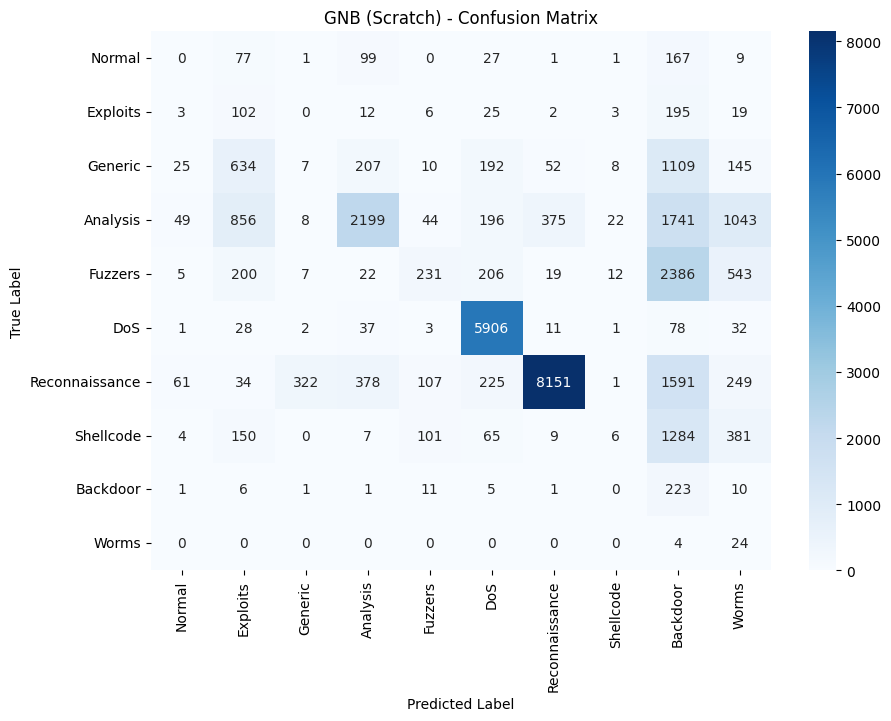

In [61]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train_gnb, y_train_gnb)
y_pred_gnb = gnb.predict(X_val_gnb)

evaluate_model("GNB (Scratch)", y_val_gnb, y_pred_gnb, classes=class_names)

### GNB Implementation From Library

=== GNB (Library) Evaluation ===
                precision    recall  f1-score   support

        Normal       0.03      0.00      0.00       382
      Exploits       0.00      0.00      0.00       367
       Generic       0.00      0.00      0.00      2389
      Analysis       0.25      0.29      0.27      6533
       Fuzzers       0.00      0.00      0.00      3631
           DoS       0.45      0.86      0.59      6099
Reconnaissance       0.66      0.74      0.70     11119
     Shellcode       0.24      0.00      0.01      2007
      Backdoor       0.02      0.09      0.04       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.47     32814
     macro avg       0.17      0.20      0.16     32814
  weighted avg       0.37      0.47      0.40     32814

Macro-Averaged F1 Score: 0.1613


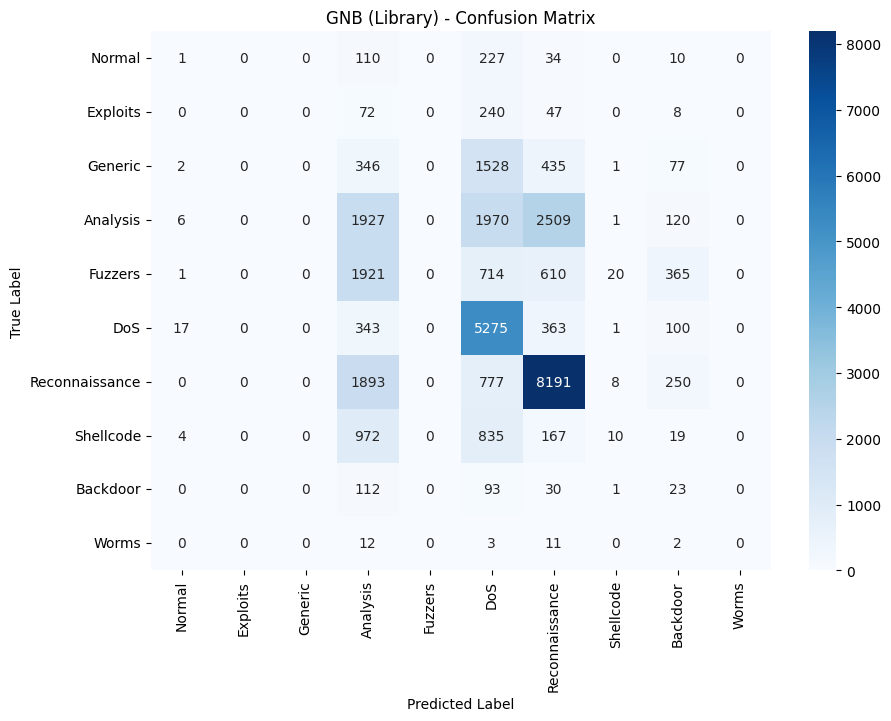

In [62]:
gnb_lib = GaussianNB()
gnb_lib.fit(X_train_gnb, y_train_gnb)
y_pred_gnb_lib = gnb_lib.predict(X_val_gnb)
y_proba_gnb_lib = gnb_lib.predict_proba(X_val_gnb)[:, 1] if len(class_names) == 2 else None

evaluate_model("GNB (Library)", y_val_gnb, y_pred_gnb_lib, y_proba_gnb_lib, classes=class_names)

## C. ID3

### ID3 Implementation From Scratch

In [63]:
# Class for tree node
class Node():
    def __init__(self, name: str, isResult: bool):
        self.name : str = name
        self.children : dict[str, Node] = {}
        self.isResult : bool = isResult

    def print(self, ind: int):
        print(" "*ind + str(self.name))
        for c in self.children:
            print(" "*(ind) + "-" + str(c))
            self.children[c].print(ind+2)

In [64]:
# Class for ID3 model
class ID3():
    def __init__(self, random_seed: int = 0):
        self.start : Node = Node('', False)
        self.colVal: dict[str, list[str]] = {}
        self.thresholds : dict[str, float] = {}
        self.random_seed = random_seed

    def fit(self, X: pd.DataFrame, y: pd.Series):
        x_train = X.copy()
        for c in x_train.columns:
            if (x_train[c].dtype != 'object') and (x_train[c].nunique() > 2):
                split = self.__discretize(x_train[c], y)
                self.thresholds.update({c: split})
                x_train[c] = x_train[c] >= split

            self.colVal.update({c: x_train[c].unique()})
        self.start = self.__decision_tree_learning(x_train, y, None)

    def predict(self, X: pd.DataFrame):
        xc = X.copy()
        for c in self.thresholds:
            xc[c] = xc[c] >= self.thresholds[c]
        result = []
        for row in xc.iterrows():
            node = self.start
            while not node.isResult:
                node = node.children.get(row[1][node.name])
            result.append(node.name)
        return result

    def __entropy(self, s: pd.Series) -> float:
        vcount = s.value_counts(normalize=True, sort=False)
        return -(vcount*np.log2(vcount)).sum()

    def __information_gain(self, x: pd.Series, y: pd.Series) -> float:
        vcount = x.value_counts(normalize=True, sort=False)
        ent = [self.__entropy(y[x[x == val].index]) for val in vcount.index]
        return (vcount*ent).sum()

    def __plurality_value(self, y: pd.Series):
        modes = y.mode()
        return modes[self.random_seed % len(modes)]

    def __best_attr(self, x: pd.DataFrame, y: pd.Series) -> str:
        return x.columns[np.argmin([self.__information_gain(x[col], y) for col in x.columns])]

    def __discretize(self, x: pd.Series, y: pd.Series):
        d = pd.concat([x, y], axis=1)
        d = d.sort_values(by=[x.name], ascending=True)
        avg_of_y = [d[d[y.name] == val][x.name].mean() for val in y.unique()]
        avg_between_y = [(avg_of_y[i]+avg_of_y[i+1])/2 for i in range (len(avg_of_y)-1)]

        best_gain = 9999
        best_split = 0
        for val in avg_between_y:
            gain = self.__information_gain(x >= val, y)
            if gain < best_gain:
                best_gain = gain
                best_split = val

        return best_split

    def __decision_tree_learning(self, x: pd.DataFrame, y: pd.Series, yParent: pd.Series | None):
        if len(y) == 0:
            return Node(self.__plurality_value(yParent), True)
        elif (y.nunique() == 1):
            return Node(y.head(1).values[0], True)
        elif x.empty:
            return Node(self.__plurality_value(y), True)
        else:
            col = self.__best_attr(x, y)
            tree = Node(col, False)
            for val in self.colVal[col]:
                exs = x[x[col] == val].drop(columns=[col])
                subtree = self.__decision_tree_learning(exs, y[exs.index], y)
                tree.children[val] = subtree
            return tree

=== ID3 (Scratch) Evaluation ===
                precision    recall  f1-score   support

        Normal       0.08      0.19      0.12       382
      Exploits       0.05      0.14      0.08       367
       Generic       0.21      0.07      0.10      2389
      Analysis       0.58      0.54      0.56      6533
       Fuzzers       0.57      0.35      0.43      3631
           DoS       0.99      0.94      0.97      6099
Reconnaissance       0.89      0.81      0.85     11119
     Shellcode       0.27      0.29      0.28      2007
      Backdoor       0.03      0.37      0.05       259
         Worms       0.04      0.82      0.09        28

      accuracy                           0.63     32814
     macro avg       0.37      0.45      0.35     32814
  weighted avg       0.70      0.63      0.65     32814

Macro-Averaged F1 Score: 0.3515


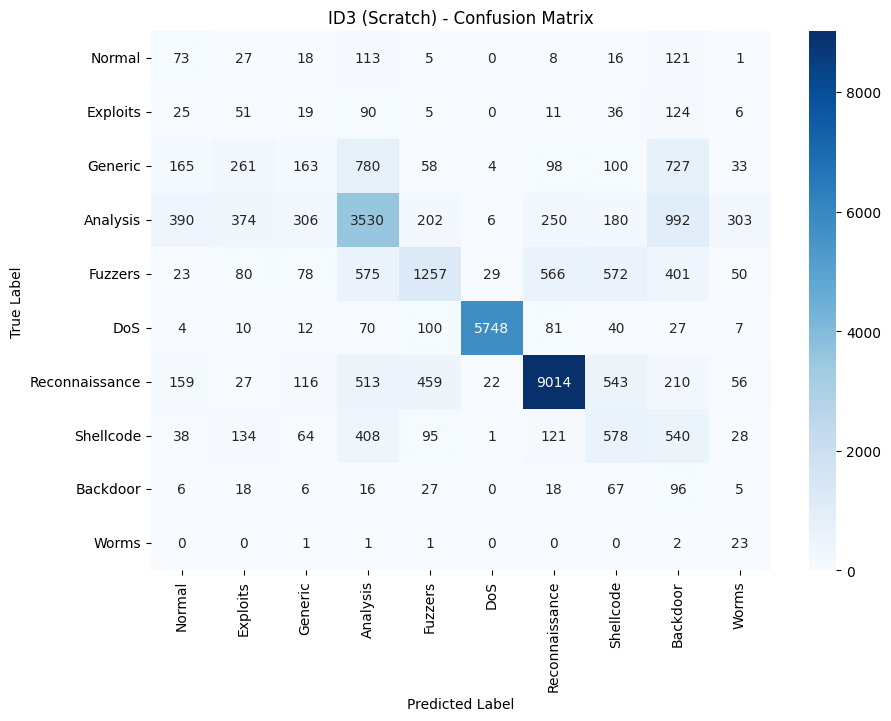

In [65]:
id3 = ID3()
id3.fit(X_train_id3, y_train_id3)
y_pred_id3 = id3.predict(X_val_id3)

evaluate_model("ID3 (Scratch)", y_val_id3, y_pred_id3, classes=class_names)

### ID3 Implementation From Library

=== ID3 (Library) Evaluation ===
                precision    recall  f1-score   support

        Normal       0.08      0.31      0.12       382
      Exploits       0.05      0.25      0.08       367
       Generic       0.28      0.18      0.22      2389
      Analysis       0.65      0.48      0.55      6533
       Fuzzers       0.53      0.33      0.41      3631
           DoS       0.99      0.97      0.98      6099
Reconnaissance       0.85      0.87      0.86     11119
     Shellcode       0.73      0.68      0.70      2007
      Backdoor       0.10      0.47      0.17       259
         Worms       0.05      0.86      0.10        28

      accuracy                           0.67     32814
     macro avg       0.43      0.54      0.42     32814
  weighted avg       0.73      0.67      0.69     32814

Macro-Averaged F1 Score: 0.4185


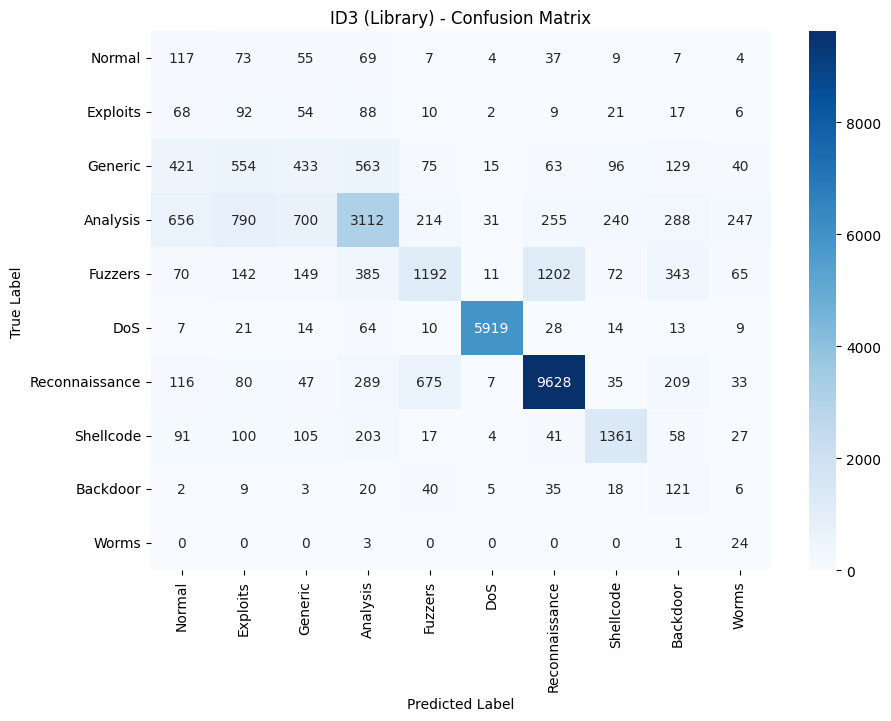

In [66]:
id3_lib = DecisionTreeClassifier(criterion='entropy')
id3_lib.fit(X_train_id3, y_train_id3)
y_pred_id3_lib = id3_lib.predict(X_val_id3)

evaluate_model("ID3 (Library)", y_val_id3, y_pred_id3_lib, classes=class_names)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [67]:
# visualize the model evaluation result done

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
final_pipeline = Pipeline([
    ('encoding', FeatureEncoder()),
    ('scaling', FeatureScaler()),
])

X_train_final = final_pipeline.fit_transform(original_train_set.drop(columns=['attack_cat']))
y_train_final = original_train_set['attack_cat']

X_test = final_pipeline.transform(df_test)

final_model = knn
final_model.fit(X_train_final, y_train_final)

y_test_pred = final_model.predict(X_test)

submission = pd.DataFrame({
    'id': range(len(df_test)),
    'attack_cat': y_test_pred
})

submission.to_csv('submission.csv', index=False)
print("Submission file created: 'submission_id3.csv'")

/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### Save Model

In [ ]:
model_filename = "knn.pkl"

with open(model_filename, 'wb') as file:
    pickle.dump(knn, file)

print(f"Model saved to {model_filename}")

### Load Model

In [ ]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

### Reducing Dataset Size  
Given the large size of the dataset, training times were unreasonably long. To overcome this, We significantly reduced the majority classes such as **Normal**, **Exploits**, and **Generic** while preserving minority classes. The reduction helped to improve the speed of training and SMOTE while retaining class representativeness. This trade-off was necessary to balance computational time and data quality.

### Feature Scaling  
Feature scaling using **StandardScaler** was applied to ensure that numerical features were on the same scale, which is particularly important for distance-based models like **KNN**. Without scaling, the model would give more weight to features with larger magnitudes. The scaling process helped to stabilize the model performance, particularly for KNN, as it relies heavily on feature magnitudes for distance calculations.

### Feature Encoding  
Categorical features were encoded using **Label Encoding** instead of One-Hot Encoding to reduce dimensionality. One-Hot Encoding, while useful, would have increased the number of features significantly due to the presence of multiple categories, making the training process slower. Label Encoding provided a compact representation and worked well for the chosen models.

### Missing Data Handling  
Missing values in numerical features were imputed using the **mean**, as it preserves the distribution of the data. For categorical features, missing values were replaced with the mode, or the most frequent category, ensuring that the integrity of the categorical feature distribution was maintained. Dropping missing values was avoided as it could lead to data loss, especially when dealing with minority classes.

### Pipeline Integration  
To streamline preprocessing, I implemented custom **pipelines** for each model. Each pipeline included feature scaling, encoding, and imbalance handling using SMOTE. This approach ensured consistency and reproducibility across different models such as **KNN**, **Gaussian Naive Bayes (GNB)**, and **ID3**. The modularity of pipelines allowed for flexibility during training and validation.

### Model Performance and Evaluation  
The models were evaluated using multiple metrics, including **F1-score (macro average)**, **confusion matrices**, and **ROC-AUC curves**, to identify class-specific performance. The **KNN** model performed well after applying scaling and SMOTE, particularly in predicting balanced classes. However, **GNB** struggled with class imbalance due to its assumption of feature independence, while **ID3** had limitations in handling continuous features without significant preprocessing.

### Key Challenges and Solutions  
1. **Long Training Time**: Addressed by reducing majority classes and limiting the data size before applying SMOTE.  
2. **Unseen Labels in Validation Set**: Fixed by replacing unseen labels in the validation set with "unknown" to ensure consistency during encoding.  
3. **Class Imbalance**: Solved using SMOTE to oversample minority classes, improving model predictions for underrepresented categories.  
4. **Inconsistent Preprocessing**: Standardized the preprocessing pipeline to ensure uniform transformations across train, validation, and test datasets.  

### Final Remarks  
The error analysis revealed that handling class imbalance and scaling features were critical to improving the performance of the models, especially KNN. While SMOTE helped balance the dataset, careful dataset reduction was necessary to maintain efficiency. Consistent preprocessing through pipelines ensured reliable results, and evaluating models using multiple metrics provided insights into areas for further improvement.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1612ee1c-1251-45bc-9c6d-47a7565a6065' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>